In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Importing my dataset

suicide_by_education = pd.read_csv("Educational_status_of_suicide_victimes_state.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Educational_status_of_suicide_victimes_state.csv'

In [9]:
#Information about the data

suicide_by_education.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE/UT  4104 non-null   object
 1   Year      4104 non-null   int64 
 2   CAUSE     4104 non-null   object
 3   Male      4104 non-null   int64 
 4   Female    4104 non-null   int64 
 5   Total     4104 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 192.5+ KB


In [10]:
#Having a glance at the first few rows

suicide_by_education.head()

,STATE/UT,Year,CAUSE,Male,Female,Total
0,ANDHRA PRADESH,2001,No Education,2117,1657,3774
1,ANDHRA PRADESH,2001,Primary,1536,1076,2612
2,ANDHRA PRADESH,2001,Middle,1281,722,2003
3,ANDHRA PRADESH,2001,Matriculate/Secondary,818,449,1267
4,ANDHRA PRADESH,2001,Hr. Secondary/Intermediate/Pre-Universit,427,168,595


In [11]:
#Having a glance at the last few rows

suicide_by_education.tail()

,STATE/UT,Year,CAUSE,Male,Female,Total
4099,TOTAL (ALL INDIA),2012,Hr. Secondary/Intermediate/Pre-Universit,8792,4297,13089
4100,TOTAL (ALL INDIA),2012,Diploma,1391,652,2043
4101,TOTAL (ALL INDIA),2012,Graduate,3072,1500,4572
4102,TOTAL (ALL INDIA),2012,Post Graduate and Above,562,278,840
4103,TOTAL (ALL INDIA),2012,Total,88453,46992,135445


In [12]:
#Checking data types of all columns

suicide_by_education.dtypes

STATE/UT    object
Year         int64
CAUSE       object
Male         int64
Female       int64
Total        int64
dtype: object

In [13]:
#Renaming the Cause column as it is misleading

suicide_by_education = suicide_by_education.rename(columns = {"CAUSE": "Education level"})

In [14]:
#Making sure if the column has been renamed

suicide_by_education.head()

,STATE/UT,Year,Education level,Male,Female,Total
0,ANDHRA PRADESH,2001,No Education,2117,1657,3774
1,ANDHRA PRADESH,2001,Primary,1536,1076,2612
2,ANDHRA PRADESH,2001,Middle,1281,722,2003
3,ANDHRA PRADESH,2001,Matriculate/Secondary,818,449,1267
4,ANDHRA PRADESH,2001,Hr. Secondary/Intermediate/Pre-Universit,427,168,595


In [15]:
#Finding the null values

print(suicide_by_education.isna().sum())


STATE/UT           0
Year               0
Education level    0
Male               0
Female             0
Total              0
dtype: int64


In [16]:
#Year of interest is 2011, retrieving suicide data for this specific year

suicide_by_education.loc[suicide_by_education['Year'] == 2011]


,STATE/UT,Year,Education level,Male,Female,Total
90,ANDHRA PRADESH,2011,No Education,3015,1724,4739
91,ANDHRA PRADESH,2011,Primary,1979,1007,2986
92,ANDHRA PRADESH,2011,Middle,2327,1028,3355
93,ANDHRA PRADESH,2011,Matriculate/Secondary,1484,642,2126
94,ANDHRA PRADESH,2011,Hr. Secondary/Intermediate/Pre-Universit,873,450,1323
...,...,...,...,...,...,...
4090,TOTAL (ALL INDIA),2011,Hr. Secondary/Intermediate/Pre-Universit,8099,4132,12231
4091,TOTAL (ALL INDIA),2011,Diploma,1021,363,1384
4092,TOTAL (ALL INDIA),2011,Graduate,2300,1122,3422
4093,TOTAL (ALL INDIA),2011,Post Graduate and Above,460,243,703


In [17]:
#Checking the number of education levels available

suicide_by_education['Education level'].value_counts().count()

9

In [18]:
#Checking out the categories in education level

suicide_by_education['Education level'].value_counts().index

Index(['No Education', 'Primary', 'Graduate', 'Post Graduate and Above',
       'Total', 'Matriculate/Secondary', 'Diploma',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Middle'],
      dtype='object')

In [19]:
#Checking the total number of states and Union territories the data is available for

suicide_by_education['STATE/UT'].value_counts().count()

38

In [20]:
#Checking the states the data is available for

suicide_by_education['STATE/UT'].value_counts().index

Index(['NAGALAND', 'KARNATAKA', 'MAHARASHTRA', 'HARYANA', 'KERALA',
       'ARUNACHAL PRADESH', 'ANDHRA PRADESH', 'UTTARAKHAND', 'DAMAN & DIU',
       'GOA', 'D & N HAVELI', 'ASSAM', 'A & N ISLANDS', 'SIKKIM', 'TAMIL NADU',
       'ODISHA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MIZORAM', 'MANIPUR',
       'RAJASTHAN', 'TOTAL (UTs)', 'CHHATTISGARH', 'TRIPURA', 'BIHAR',
       'JAMMU & KASHMIR', 'GUJARAT', 'MEGHALAYA', 'UTTAR PRADESH',
       'TOTAL (STATES)', 'DELHI (UT)', 'CHANDIGARH', 'JHARKHAND',
       'WEST BENGAL', 'TOTAL (ALL INDIA)', 'PUDUCHERRY', 'HIMACHAL PRADESH',
       'PUNJAB'],
      dtype='object')

In [21]:
#Checking for outliers, for the year 2011 if number of the suicide victims were expectional in any state/UT

data_for_plot = suicide_by_education[(suicide_by_education['Year'] == 2011) & (suicide_by_education['Education level'] == 'Total')]
                                    


In [22]:
#These three rows contain total suicide count by states, UT and all over India, that'd distort the boxplot, we don't need them

data_for_plot1 = data_for_plot.drop([3122, 3986,4094])


In [23]:
data_for_plot1

,STATE/UT,Year,Education level,Male,Female,Total
98,ANDHRA PRADESH,2011,Total,10120,4957,15077
206,ARUNACHAL PRADESH,2011,Total,99,35,134
314,ASSAM,2011,Total,1826,900,2726
422,BIHAR,2011,Total,446,349,795
530,CHHATTISGARH,2011,Total,4527,2229,6756
638,GOA,2011,Total,195,98,293
746,GUJARAT,2011,Total,3912,2470,6382
854,HARYANA,2011,Total,2464,781,3245
962,HIMACHAL PRADESH,2011,Total,269,174,443
1070,JAMMU & KASHMIR,2011,Total,144,143,287


<AxesSubplot:xlabel='Total'>

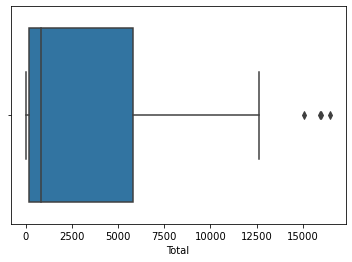

In [24]:
#Plotting a boxplot to detect outliers, if any

sns.boxplot(x = data_for_plot1['Total'])

In [25]:
#As per the above plot, there are three states with exceptionally high number of suicide victims in year 2011 as compared to the rest of the states.

Q1 =  data_for_plot1['Total'].quantile(0.25)
Q3 = data_for_plot1['Total'].quantile(0.75)
IQR = Q3- Q1

In [26]:
data_for_plot1[(data_for_plot1['Total'] < Q1-1.5*IQR ) | (data_for_plot1['Total'] > Q3+1.5*IQR)]['STATE/UT']

98      ANDHRA PRADESH
1610       MAHARASHTRA
2582        TAMIL NADU
3014       WEST BENGAL
Name: STATE/UT, dtype: object

In [27]:
#The above result shows the corresponding states 

In [28]:
#Having a visual glance at suicide count of all states combined and all union territories combined for the year 2011

viz1 = data_for_plot[(data_for_plot['STATE/UT'] == 'TOTAL (STATES)') | (data_for_plot['STATE/UT'] == 'TOTAL (UTs)') &
               (data_for_plot['Education level'] == 'Total')]

In [29]:
viz1

,STATE/UT,Year,Education level,Male,Female,Total
3122,TOTAL (STATES),2011,Total,86065,46910,132975
3986,TOTAL (UTs),2011,Total,1774,836,2610


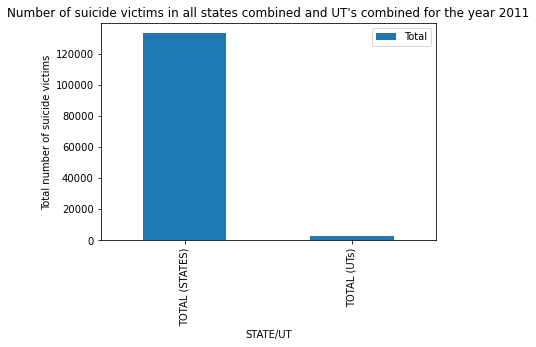

In [30]:
viz1.plot(x ='STATE/UT', y='Total', kind = 'bar')
plt.ylabel("Total number of suicide victims")
plt.title("Number of suicide victims in all states combined and UT's combined for the year 2011")
plt.show()


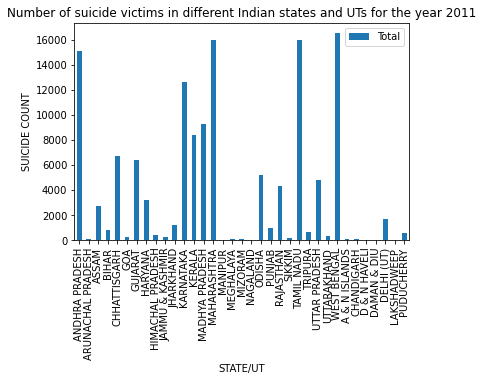

In [31]:
#Looking at suicide numbers for all states and Union territories individually

data_for_plot1.plot(x ='STATE/UT', y='Total', kind = 'bar')
plt.ylabel("SUICIDE COUNT")
plt.title("Number of suicide victims in different Indian states and UTs for the year 2011")
plt.show()


In [44]:
#It would be useful to view number of suicide victims classified by their educational status 

viz2 = suicide_by_education[(suicide_by_education['Year'] == 2011) & (suicide_by_education['Education level'] != 'Total')]

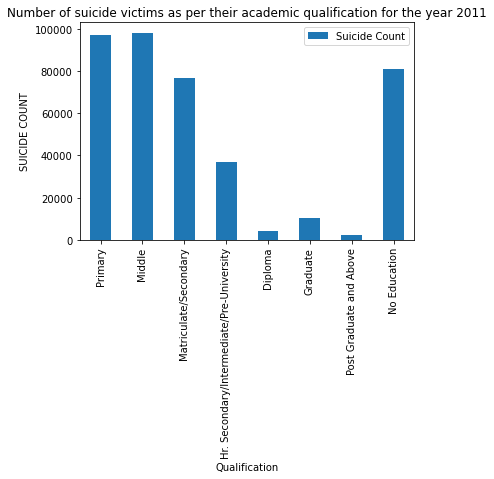

In [40]:
df.plot(x ='Education level', y='Suicide Count', kind = 'bar')
plt.xlabel("Qualification")
plt.ylabel("SUICIDE COUNT")
plt.title("Number of suicide victims as per their academic qualification for the year 2011")
plt.show()